# ATMS Instrumentation Lab

#### Analysis of University of Wyoming Radiosonde data for the Delhi region for the time period for 13th October 2020 : 00UTC This is to the study the Diurnal variation of atmospheric variables and other important parameters over the Delhi region. 

Work done by Aditya Sengupta (Roll No. - 420AS2068)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import requests

import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn-pastel')
sns.set_theme(style="whitegrid")

from descartes import PolygonPatch
import statsmodels.api as sm

%matplotlib inline

In [2]:
data00 = pd.read_csv('delhi_radiosonde_data00.csv')
data00.head()

,PRES(hPa),HGHT(m),TEMP(C),DWPT(C),RELH(%),MIXR(g/kg),DRCT(deg),SKNT(knot),THTA(K),THTE(K),THTV(K)
0,1000.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,973.0,216,20.8,16.8,78.0,12.52,0.0,0.0,296.3,332.6,298.5
2,960.0,349,26.8,19.8,66.0,15.39,42.0,5.0,303.5,349.4,306.3
3,956.0,391,26.6,18.6,61.0,14.32,55.0,7.0,303.6,346.4,306.2
4,942.0,538,27.2,16.2,51.0,12.45,102.0,12.0,305.5,343.1,307.8


In [3]:
data12 = pd.read_csv('delhi_radiosonde_data12.csv')
data12.head()

,PRES(hPa),HGHT(m),TEMP(C),DWPT(C),RELH(%),MIXR(g/kg),DRCT(deg),SKNT(knot),THTA(K),THTE(K),THTV(K)
0,1000.0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,973.0,216,32.8,20.8,49.0,16.17,0.0,0.0,308.4,357.7,311.3
2,969.0,258,31.2,19.2,49.0,14.67,13.0,0.0,307.1,351.6,309.8
3,961.0,342,30.4,18.4,49.0,14.06,39.0,1.0,307.0,349.7,309.6
4,938.0,585,28.6,17.9,52.0,13.95,115.0,2.0,307.3,349.7,309.9


In [4]:
col00 = []
for index in data00.index:
    col00.append("00UTC")
    
data00["Time"] = col00

#Similarly
col12 = []
for index in data12.index:
    col12.append("12UTC")
    
data12["Time"] = col12

In [43]:
data = pd.concat([data00,data12])
data.set_index('HGHT(m)')
data.head()

,PRES(hPa),HGHT(m),TEMP(C),DWPT(C),RELH(%),MIXR(g/kg),DRCT(deg),SKNT(knot),THTA(K),THTE(K),THTV(K),Time
0,1000.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00UTC
1,973.0,216,20.8,16.8,78.0,12.52,0.0,0.0,296.3,332.6,298.5,00UTC
2,960.0,349,26.8,19.8,66.0,15.39,42.0,5.0,303.5,349.4,306.3,00UTC
3,956.0,391,26.6,18.6,61.0,14.32,55.0,7.0,303.6,346.4,306.2,00UTC
4,942.0,538,27.2,16.2,51.0,12.45,102.0,12.0,305.5,343.1,307.8,00UTC


### Pressure Vertical Profile

Text(0, 0.5, 'Height(m)')

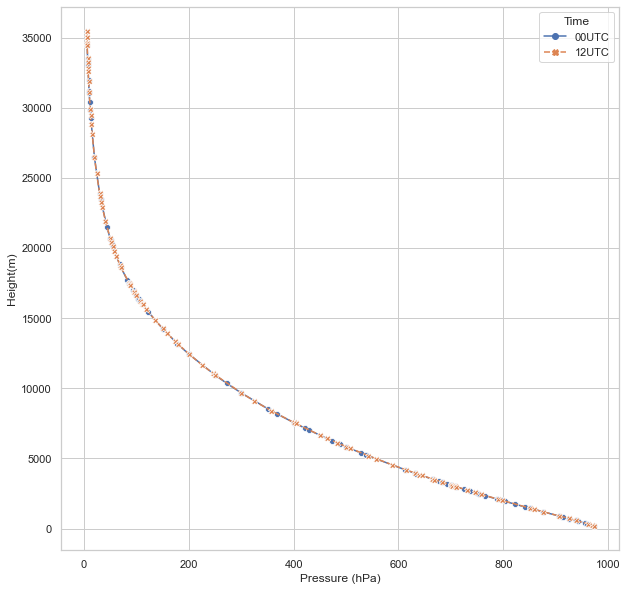

In [44]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data.dropna(), x='PRES(hPa)', y='HGHT(m)', hue='Time', style='Time', markers=True)
# sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.xlabel('Pressure (hPa)', fontsize=12)
plt.ylabel('Height(m)', fontsize=12)

### Temp Vertical Profile

Text(0.5, 0, 'Height(m)')

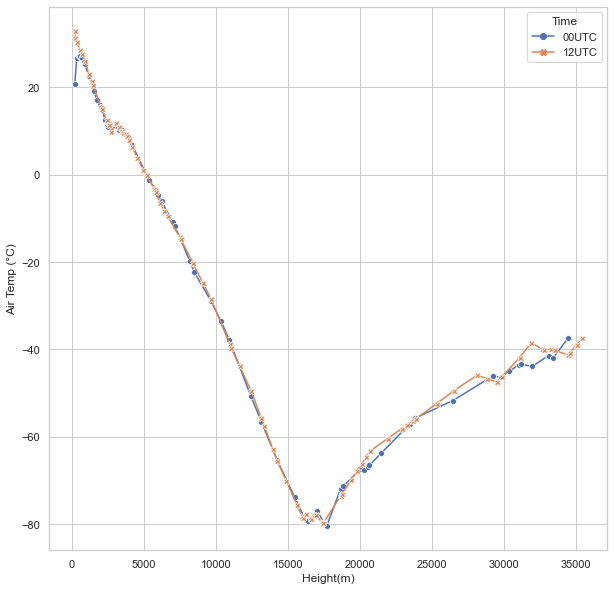

In [57]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data.dropna(), x='HGHT(m)', y='TEMP(C)', hue='Time', style='Time', markers=True, dashes=False)
#sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Air Temp (°C)', fontsize=12)
plt.xlabel('Height(m)', fontsize=12)

### Dew Point  Temp vertical profile

Text(0.5, 0, 'Height(m)')

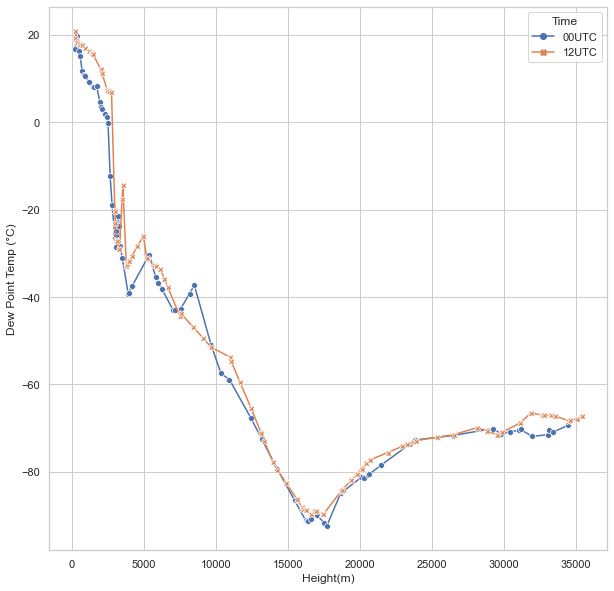

In [34]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data.dropna(), x='HGHT(m)', y='DWPT(C)', hue='Time', style='Time',markers=True, dashes=False)
#sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Dew Point Temp (°C)', fontsize=12)
plt.xlabel('Height(m)', fontsize=12)

### RELH Vertical Profile

In [35]:
data.head()

,PRES(hPa),HGHT(m),TEMP(C),DWPT(C),RELH(%),MIXR(g/kg),DRCT(deg),SKNT(knot),THTA(K),THTE(K),THTV(K),Time
0,1000.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00UTC
1,973.0,216,20.8,16.8,78.0,12.52,0.0,0.0,296.3,332.6,298.5,00UTC
2,960.0,349,26.8,19.8,66.0,15.39,42.0,5.0,303.5,349.4,306.3,00UTC
3,956.0,391,26.6,18.6,61.0,14.32,55.0,7.0,303.6,346.4,306.2,00UTC
4,942.0,538,27.2,16.2,51.0,12.45,102.0,12.0,305.5,343.1,307.8,00UTC


Text(0.5, 0, 'Height(m)')

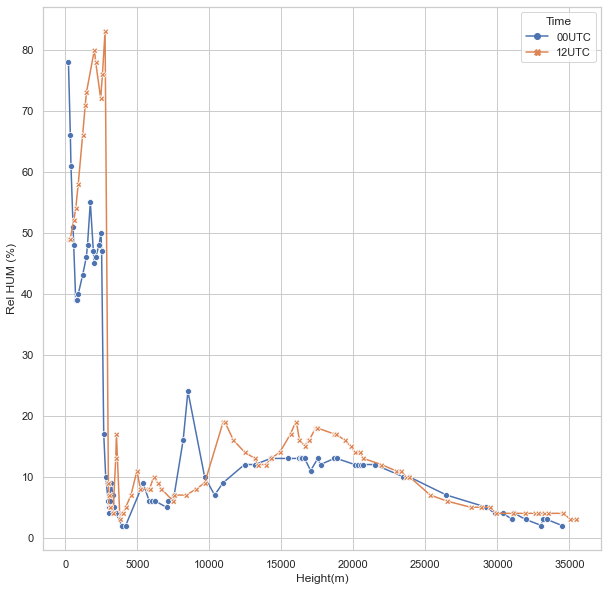

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data.dropna(), x='HGHT(m)', y='RELH(%)', hue='Time', style='Time', markers=True, dashes=False)
#sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Rel HUM (%)', fontsize=12)
plt.xlabel('Height(m)', fontsize=12)

### Mixing Ratio vertical profile

Text(0.5, 0, 'Height(m)')

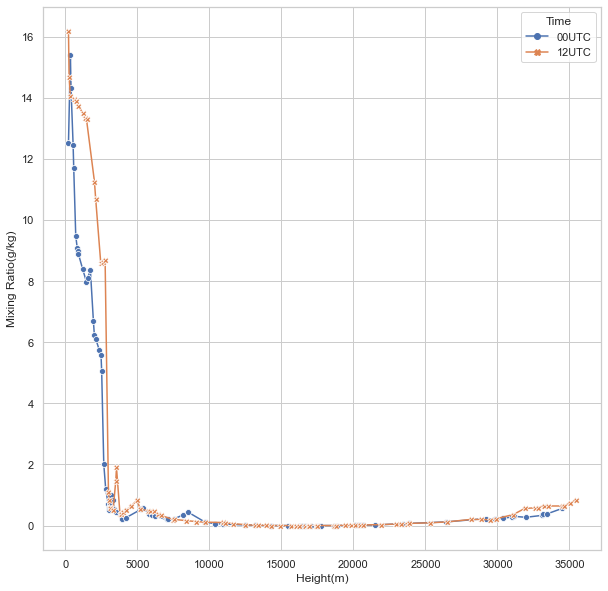

In [37]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data.dropna(), x='HGHT(m)', y='MIXR(g/kg)', hue='Time', style='Time', markers=True, dashes=False)
#sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Mixing Ratio(g/kg)', fontsize=12)
plt.xlabel('Height(m)', fontsize=12)

### Wind Speed vertical profile

Text(0.5, 0, 'Height(m)')

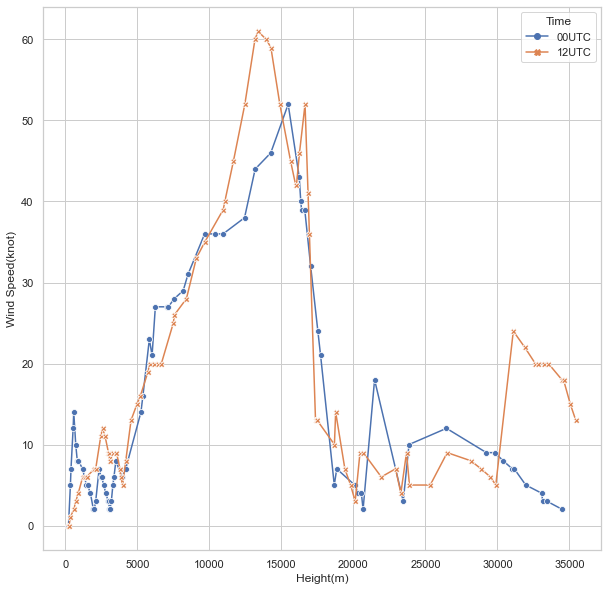

In [38]:
plt.figure(figsize=(10,10))
sns.lineplot(data = data.dropna(), x='HGHT(m)', y='SKNT(knot)', hue='Time', style='Time', markers=True, dashes=False)
#sns.lineplot(data = data, x='date_ist', y='Tc', hue='season')
#plt.xticks(rotation= 10)
plt.ylabel('Wind Speed(knot)', fontsize=12)
plt.xlabel('Height(m)', fontsize=12)